In [1]:
###########################################################################################
# Code to automate the data extraction and creation of fundamental plots for the FE ASICs #
#                       --> Includes Cryocycles [0,5,20,100]                              #
#                               Author: Steven Doran                                      #
###########################################################################################

import matplotlib.pyplot as plt
import numpy as np

TotalChips = int(100)                             # specify number of chips you are using for data
TotalCryo = int(4); Cryocycles = [0,5,20,100]    # specify cryocyles

T = []
# Need to adjust the numbering of the chips
# We start at 20 for this batch
for i in range(TotalChips):
    T.append(i+20)

# Create strings so it can automatically read in txt data
chips = []
for i in range(TotalChips):
    a = 'chip' + str(i+20)
    chips = np.append(chips,a)
data = []; txt = []
for i in range(len(chips)):
    data.append([]); txt.append([])
for i in range(len(chips)):
    for j in Cryocycles:
        e = 'DataRT' + str(j) + str(chips[i])
        data[i] = np.append(data[i],e)
        f = str(chips[i]) + 'RT' + str(j) + '.dat'
        txt[i] = np.append(txt[i],f)   # stores the actual data file's name we wish to extract from

# extract data to RMS,Mean,Gain,Ch,PF arrays
# Data[i][j][k] = RMS[chip#][Cryocycle#][channel#]
RMS = np.zeros((len(chips),len(Cryocycles),16))
Mean = np.zeros((len(chips),len(Cryocycles),16))
Ch = np.zeros((len(chips),len(Cryocycles),16))
PF = np.zeros((len(chips),len(Cryocycles),16))
Gain = np.zeros((len(chips),len(Cryocycles),16))
ENC = np.zeros((len(chips),len(Cryocycles),16))

for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        r = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        rr = r.T[0]
        RMS[j][i] = rr[:]
        m = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        mm = m.T[1]
        Mean[j][i] = mm[:]
        cc = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        ccc = cc.T[2]
        Ch[j][i] = ccc[:]
        p = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        passfail = p.T[3]
        PF[j][i] = passfail[:]
        g = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        gg = g.T[4]
        Gain[j][i] = gg[:]
        ee = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        en = ee.T[5]
        ENC[j][i] = en[:]
        
# Normalize the channel Numbers
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        for k in range(len(Ch[i][j])):
            if 32. > Ch[i][j][k] > 15.:
                Ch[i][j][k] = Ch[i][j][k] - 16.
            if 48. > Ch[i][j][k] > 31.:
                Ch[i][j][k] = Ch[i][j][k] - 32.
            if Ch[i][j][k] > 47.:
                Ch[i][j][k] = Ch[i][j][k] - 48.

# Fill lists of lists based off of Pass-Fail
# passRMS, etc... will be filled with data on passed values; failRMS with failed
passRMS = []; passMean = []; passCh = []; passPF = []; passGain = []; passENC = []
failRMS = []; failMean = []; failCh = []; failPF = []; failGain = []; failENC = []

# create a list of lists - containing each chip as a seperate index
for i in range(len(chips)):
    passRMS.append(([])); passMean.append(([])); passCh.append(([])); passPF.append(([])); passGain.append(([]))
    failRMS.append(([])); failMean.append(([])); failCh.append(([])); failPF.append(([])); failGain.append(([]))
    passENC.append(([])); failENC.append(([]))
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        passRMS[i].append(([])); passMean[i].append(([])); 
        passCh[i].append(([])); passPF[i].append(([])); passGain[i].append(([]))
        failRMS[i].append(([])); failMean[i].append(([]));
        failCh[i].append(([])); failPF[i].append(([])); failGain[i].append(([]))
        passENC[i].append(([])); failENC[i].append(([]))
# append data to the associated lists, based off of P/F
for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[j][i][k] == 0.:
                passRMS[j][i].append((RMS[j][i][k])); passMean[j][i].append((Mean[j][i][k]));
                passCh[j][i].append((Ch[j][i][k]))
                passPF[j][i].append((PF[j][i][k])); passGain[j][i].append((Gain[j][i][k]))
                passENC[j][i].append((ENC[j][i][k]))
            if PF[j][i][k] == 1.:
                failRMS[j][i].append((RMS[j][i][k])); failMean[j][i].append((Mean[j][i][k]));
                failCh[j][i].append((Ch[j][i][k]))
                failPF[j][i].append((PF[j][i][k])); failGain[j][i].append((Gain[j][i][k]))
                failENC[j][i].append((ENC[j][i][k]))

print('done')

done


### Histograms


RT RMS, and ENC Distributions are well approximated as gamma distributions
Gamma Distribution Parameters (shape-rate parametrization): 
E(x) = shape*scale; V(x) = shape*(scale^2); std dev = sqrt(shape*(scale^2))

RT Mean and Gain Distributions are well approximated as normal distributions
Normal Distribution Parameters: 
E(x) = mu; V(x) = sigma^2; std dev = sigma

RMS RT[0] fits (shape, loc, scale) =  24.568066157576503 4.19083 2.712661251146033
RMS RT[5] fits (shape, loc, scale) =  16.765386576156335 3.70328 3.371616222451983
RMS RT[20] fits (shape, loc, scale) =  14.111563362024535 4.00169 3.9300246031916446
RMS R[100] fits (shape, loc, scale) =  20.480151713663332 4.7118400000000005 2.66493060554432
ENC RT[0] fits (shape, loc, scale) =  21.941193927400747 220.6 158.26203209313525
ENC RT[5] fits (shape, loc, scale) =  15.356407368779955 195.5 191.05495775433988
ENC RT[20] fits (shape, loc, scale) =  13.055805966859719 210.0 220.5433844240033
ENC RT[100] fits (shape, loc, scale) =  1

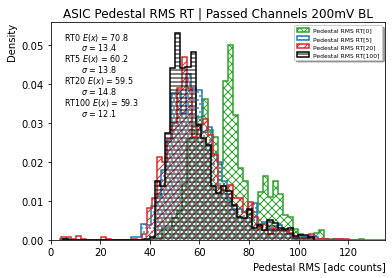

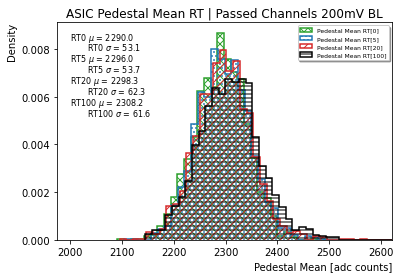

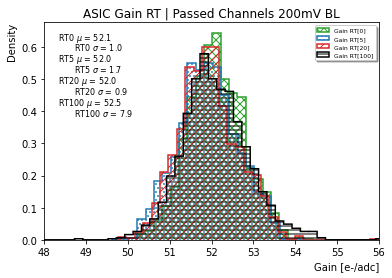

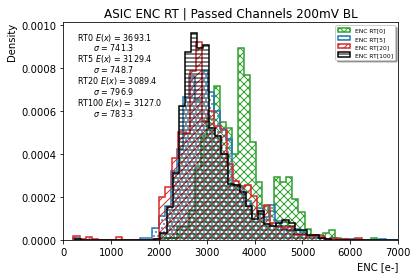

done


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
from statistics import NormalDist
from scipy.stats import norm

# Histograms - Append data into pass/fail
pR = []; pM = []; pG = []   # Pass RMS, Mean, Gain
fR = []; fM = []; fG = []   # Failed RMS, Mean, Gain
pE = []; fE = []            # ENC

for i in range(len(Cryocycles)):
    pR.append([]); pM.append([]); pG.append([]); fR.append([]); fM.append([]); fG.append([])
    pE.append([]); fE.append([])

# passMean[chip][cryo][data]
    
for i in range(len(passMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(passMean[i][j])):
            pM[j].append(passMean[i][j][k])
for i in range(len(failMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(failMean[i][j])):
            fM[j].append(failMean[i][j][k])
    
for i in range(len(passRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(passRMS[i][j])):
            pR[j].append(passRMS[i][j][k])
for i in range(len(failRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(failRMS[i][j])):
            fR[j].append(failRMS[i][j][k])
            
for i in range(len(passGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(passGain[i][j])):
            pG[j].append(passGain[i][j][k])
for i in range(len(failGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(failGain[i][j])):
            fG[j].append(failGain[i][j][k])
            
for i in range(len(passENC)):
    for j in range(len(Cryocycles)):
        for k in range(len(passENC[i][j])):
            pE[j].append(passENC[i][j][k])
for i in range(len(failENC)):
    for j in range(len(Cryocycles)):
        for k in range(len(failENC[i][j])):
            fE[j].append(failENC[i][j][k])
            
            
#############################################################################
# Instead of applying a normal approximation for all RT distributions,
# we note that the distributions are not well approximated by Gaussians so 
# we should look to other distributions to more accurately compare statistical
# parameters. We will apply the same distribution to all seperate cryocycles.

# For RMS and ENC, we choose a gamma distribution to approximate the data
# Gamma Distribution has E(x) = alpha/beta (shape-rate parametrization); V(x) = alpha/(beta^2)
# std. dev = sqrt(alpha)/beta
print('\nRT RMS, and ENC Distributions are well approximated as gamma distributions')
print('Gamma Distribution Parameters (shape-rate parametrization): ')
print('E(x) = shape*scale; V(x) = shape*(scale^2); std dev = sqrt(shape*(scale^2))')

# For Gain and Mean, we can effectively approximate the data via a normal approximation
print('\nRT Mean and Gain Distributions are well approximated as normal distributions')
print('Normal Distribution Parameters: ')
print('E(x) = mu; V(x) = sigma^2; std dev = sigma\n')

##############################################################################
################### Expectation and variance calculations ####################
##############################################################################

'''We are approximating RMS, ENC as Gamma distributions, and Mean, Gain as normal'''
# Gain - Normal
normGain0 = NormalDist.from_samples(pG[0])
G0_mean = normGain0.mean; G0_std = normGain0.stdev
G0m = 'RT0 ' + r'$\mu$' + ' = ' + str(round(G0_mean,1))
G0s = 'RT0 ' + r'$\sigma$' + ' = ' + str(round(G0_std,1))
normGain5 = NormalDist.from_samples(pG[1])
G5_mean = normGain5.mean; G5_std = normGain5.stdev
G5m = 'RT5 ' + r'$\mu$' + ' = ' + str(round(G5_mean,1))
G5s = 'RT5 ' + r'$\sigma$' + ' = ' + str(round(G5_std,1))
normGain20 = NormalDist.from_samples(pG[2])
G20_mean = normGain20.mean; G20_std = normGain20.stdev
G20m = 'RT20 ' + r'$\mu$' + ' = ' + str(round(G20_mean,1))
G20s = 'RT20 ' + r'$\sigma$' + ' = ' + str(round(G20_std,1))
normGain100 = NormalDist.from_samples(pG[3])
G100_mean = normGain100.mean; G100_std = normGain100.stdev
G100m = 'RT100 ' + r'$\mu$' + ' = ' + str(round(G100_mean,1))
G100s = 'RT100 ' + r'$\sigma$' + ' = ' + str(round(G100_std,1))

# RMS = Gamma approximation
fit_alpha0, fit_loc0, fit_beta0=stats.gamma.fit(pR[0], floc = min(pR[0]) - 0.1)
print('RMS RT[0] fits (shape, loc, scale) = ', fit_alpha0, fit_loc0, fit_beta0)
R0_mean = fit_loc0 + fit_alpha0*(fit_beta0); R0_var = fit_alpha0*(fit_beta0**2)
R0m = 'RT0 ' + r'$E(x)$' + ' = ' + str(round(R0_mean,1))
R0s = r'$\sigma$' + ' = ' + str(round(np.sqrt(R0_var),1))
fit_alpha5, fit_loc5, fit_beta5=stats.gamma.fit(pR[1], floc = min(pR[1]) - 0.1)
print('RMS RT[5] fits (shape, loc, scale) = ', fit_alpha5, fit_loc5, fit_beta5)
R5_mean = fit_loc5 + fit_alpha5*(fit_beta5); R5_var = fit_alpha5*(fit_beta5**2)
R5m = 'RT5 ' + r'$E(x)$' + ' = ' + str(round(R5_mean,1))
R5s = r'$\sigma$' + ' = ' + str(round(np.sqrt(R5_var),1))
fit_alpha20, fit_loc20, fit_beta20=stats.gamma.fit(pR[2], floc = min(pR[2]) - 0.1)
print('RMS RT[20] fits (shape, loc, scale) = ', fit_alpha20, fit_loc20, fit_beta20)
R20_mean = fit_loc20 + fit_alpha20*(fit_beta20); R20_var = fit_alpha20*(fit_beta20**2)
R20m = 'RT20 ' + r'$E(x)$' + ' = ' + str(round(R20_mean,1))
R20s = r'$\sigma$' + ' = ' + str(round(np.sqrt(R20_var),1))
fit_alpha100, fit_loc100, fit_beta100=stats.gamma.fit(pR[3], floc = min(pR[3]) - 0.1)
print('RMS R[100] fits (shape, loc, scale) = ', fit_alpha100, fit_loc100, fit_beta100)
R100_mean = fit_loc100 + fit_alpha100*(fit_beta100); R100_var = fit_alpha100*(fit_beta100**2)
R100m = 'RT100 ' + r'$E(x)$' + ' = ' + str(round(R100_mean,1))
R100s = r'$\sigma$' + ' = ' + str(round(np.sqrt(R100_var),1))

# Mean - Normal
normMean0 = NormalDist.from_samples(pM[0])
M0_mean = normMean0.mean; M0_std = normMean0.stdev
M0m = 'RT0 ' + r'$\mu$' + ' = ' + str(round(M0_mean,1))
M0s = 'RT0 ' + r'$\sigma$' + ' = ' + str(round(M0_std,1))
normMean5 = NormalDist.from_samples(pM[1])
M5_mean = normMean5.mean; M5_std = normMean5.stdev
M5m = 'RT5 ' + r'$\mu$' + ' = ' + str(round(M5_mean,1))
M5s = 'RT5 ' + r'$\sigma$' + ' = ' + str(round(M5_std,1))
normMean20 = NormalDist.from_samples(pM[2])
M20_mean = normMean20.mean; M20_std = normMean20.stdev
M20m = 'RT20 ' + r'$\mu$' + ' = ' + str(round(M20_mean,1))
M20s = 'RT20 ' + r'$\sigma$' + ' = ' + str(round(M20_std,1))
normMean100 = NormalDist.from_samples(pM[3])
M100_mean = normMean100.mean; M100_std = normMean100.stdev
M100m = 'RT100 ' + r'$\mu$' + ' = ' + str(round(M100_mean,1))
M100s = 'RT100 ' + r'$\sigma$' + ' = ' + str(round(M100_std,1))

# ENC = Gamma approximation
fit_alpha0, fit_loc0, fit_beta0=stats.gamma.fit(pE[0], floc = min(pE[0]) - 0.1)
print('ENC RT[0] fits (shape, loc, scale) = ', fit_alpha0, fit_loc0, fit_beta0)
E0_mean = fit_loc0 + fit_alpha0*(fit_beta0); E0_var = fit_alpha0*(fit_beta0**2)
E0m = 'RT0 ' + r'$E(x)$' + ' = ' + str(round(E0_mean,1))
E0s = r'$\sigma$' + ' = ' + str(round(np.sqrt(E0_var),1))
fit_alpha5, fit_loc5, fit_beta5=stats.gamma.fit(pE[1], floc = min(pE[1]) - 0.1)
print('ENC RT[5] fits (shape, loc, scale) = ', fit_alpha5, fit_loc5, fit_beta5)
E5_mean = fit_loc5 + fit_alpha5*(fit_beta5); E5_var = fit_alpha5*(fit_beta5**2)
E5m = 'RT5 ' + r'$E(x)$' + ' = ' + str(round(E5_mean,1))
E5s = r'$\sigma$' + ' = ' + str(round(np.sqrt(E5_var),1))
fit_alpha20, fit_loc20, fit_beta20=stats.gamma.fit(pE[2], floc = min(pE[2]) - 0.1)
print('ENC RT[20] fits (shape, loc, scale) = ', fit_alpha20, fit_loc20, fit_beta20)
E20_mean = fit_loc20 + fit_alpha20*(fit_beta20); E20_var = fit_alpha20*(fit_beta20**2)
E20m = 'RT20 ' + r'$E(x)$' + ' = ' + str(round(E20_mean,1))
E20s = r'$\sigma$' + ' = ' + str(round(np.sqrt(E20_var),1))
fit_alpha100, fit_loc100, fit_beta100=stats.gamma.fit(pE[3], floc = min(pE[3]) - 0.1)
print('ENC RT[100] fits (shape, loc, scale) = ', fit_alpha100, fit_loc100, fit_beta100)
E100_mean = fit_loc100 + fit_alpha100*(fit_beta100); E100_var = fit_alpha100*(fit_beta100**2)
E100m = 'RT100 ' + r'$E(x)$' + ' = ' + str(round(E100_mean,1))
E100s = r'$\sigma$' + ' = ' + str(round(np.sqrt(E100_var),1))


R0 = pR[0]; R5 = pR[1]; M0 = pM[0]; M5 = pM[1]; G0 = pG[0]; G5 = pG[1]
R20 = pR[2]; M20 = pM[2]; G20 = pG[2]; E0 = pE[0]; E5 = pE[1]; E20 = pE[2]
R100 = pR[3]; M100 = pM[3]; G100 = pG[3]; E100 = pE[3]
########################################################################
# Limits

RMSlow = 0.; RMShigh = 135.
Meanlow = 1974; Meanhigh = 2621.
Gainlow = 48; Gainhigh = 56
ENClow = 0.; ENChigh = 7000
##########################################################################
# RMS
fig, ax = plt.subplots()
ax.set_title('ASIC Pedestal RMS RT | Passed Channels 200mV BL')
ax.set_xlabel('Pedestal RMS [adc counts]', loc = 'right')
ax.set_ylabel('Density', loc = 'top')

# Proper Binning
e = max(R0)-min(R0); f = max(R5)-min(R5); g = max(R20)-min(R20); h = max(R100) - min(R100)
ratio = f/e; ratio_1 = g/e; ratio_2 = h/e
binsR0 = 60; binsR5 = int(binsR0*ratio); binsR20 = int(binsR0*ratio_1); binsR100 = int(binsR0*ratio_2)

# RT[0]
ax.hist(R0, binsR0, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'tab:green', linewidth = 1.5,
             label = 'Pedestal RMS RT[0]', density = True)

# RT[5]
ax.hist(R5, binsR5, histtype = 'step',
             hatch = '...', stacked = False, color = 'tab:blue', linewidth = 1.5,
             label = 'Pedestal RMS RT[5]', density = True)

# RT[20]
ax.hist(R20, binsR20, histtype = 'step',
             hatch = '///', stacked = False, color = 'tab:red', linewidth = 1.5,
             label = 'Pedestal RMS RT[20]', density = True)

# RT[100]
ax.hist(R100, binsR100, histtype = 'step',
             hatch = '---', stacked = False, color = 'black', linewidth = 1.5,
             label = 'Pedestal RMS RT[100]', density = True)

ax.text(.04,0.92,R0m,size = 8,transform = ax.transAxes)
ax.text(.09,0.87,R0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,R5m,size = 8,transform = ax.transAxes)
ax.text(.09,0.77,R5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.72,R20m,size = 8,transform = ax.transAxes)
ax.text(.09,0.67,R20s,size = 8,transform = ax.transAxes)
ax.text(.04,0.62,R100m,size = 8,transform = ax.transAxes)
ax.text(.09,0.57,R100s,size = 8,transform = ax.transAxes)

ax.set_xlim([RMSlow,RMShigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../RMS RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

#######################################################################################
# Mean
fig, ax = plt.subplots()
ax.set_title('ASIC Pedestal Mean RT | Passed Channels 200mV BL')
ax.set_xlabel('Pedestal Mean [adc counts]', loc = 'right')
ax.set_ylabel('Density', loc = 'top')

# Proper Binning
ii = max(M0)-min(M0); jj = max(M5)-min(M5); kk = max(M20)-min(M20); ll = max(M100) - min(M100)
ratio1 = jj/ii; ratio2 = kk/ii; ratio3 = ll/ii
binsM0 = 75; binsM5 = int(binsM0*ratio1); binsM20 = int(binsM0*ratio2); binsM100 = int(binsM0*ratio3)

# RT[0]
ax.hist(M0, binsM0, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'tab:green', linewidth = 1.5,
             label = 'Pedestal Mean RT[0]', density = True)

# RT[5]
ax.hist(M5, binsM5, histtype = 'step',
             hatch = '...', stacked = False, color = 'tab:blue', linewidth = 1.5,
             label = 'Pedestal Mean RT[5]', density = True)

# RT[20]
count, bins, ignored = ax.hist(M20, binsM20, histtype = 'step',
             hatch = '///', stacked = False, color = 'tab:red', linewidth = 1.5,
             label = 'Pedestal Mean RT[20]', density = True)

# RT[20]
count, bins, ignored = ax.hist(M100, binsM100, histtype = 'step',
             hatch = '---', stacked = False, color = 'black', linewidth = 1.5,
             label = 'Pedestal Mean RT[100]', density = True)

ax.text(.04,0.92,M0m,size = 8,transform = ax.transAxes)
ax.text(.09,0.87,M0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,M5m,size = 8,transform = ax.transAxes)
ax.text(.09,0.77,M5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.72,M20m,size = 8,transform = ax.transAxes)
ax.text(.09,0.67,M20s,size = 8,transform = ax.transAxes)
ax.text(.04,0.62,M100m,size = 8,transform = ax.transAxes)
ax.text(.09,0.57,M100s,size = 8,transform = ax.transAxes)

ax.set_xlim([Meanlow,Meanhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../Mean RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

######################################################################################
# Gain
fig, ax = plt.subplots()
ax.set_title('ASIC Gain RT | Passed Channels 200mV BL')
ax.set_xlabel('Gain [e-/adc]', loc = 'right')
ax.set_ylabel('Density', loc = 'top')

# Proper Binning
m = max(G0)-min(G0); n = max(G5)-min(G5); o = max(G20)-min(G20); p = max(G100) - min(G100)
ratio_a = n/m; ratio_b = o/m; ratio_c = p/m
binsG0 = 125; binsG5 = int(binsG0*ratio_a); binsG20 = int(binsG0*ratio_b); binsG100 = int(binsG0*ratio_c)

# RT[0]
ax.hist(G0, binsG0, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'tab:green', linewidth = 1.5,
             label = 'Gain RT[0]', density = True)

# RT[5]
ax.hist(G5, binsG5, histtype = 'step',
             hatch = '...', stacked = False, color = 'tab:blue', linewidth = 1.5,
             label = 'Gain RT[5]', density = True)

# RT[20]
ax.hist(G20, binsG20, histtype = 'step',
             hatch = '///', stacked = False, color = 'tab:red', linewidth = 1.5,
             label = 'Gain RT[20]', density = True)

# RT[20]
ax.hist(G100, binsG100, histtype = 'step',
             hatch = '---', stacked = False, color = 'black', linewidth = 1.5,
             label = 'Gain RT[100]', density = True)

ax.text(.04,0.92,G0m,size = 8,transform = ax.transAxes)
ax.text(.09,0.87,G0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,G5m,size = 8,transform = ax.transAxes)
ax.text(.09,0.77,G5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.72,G20m,size = 8,transform = ax.transAxes)
ax.text(.09,0.67,G20s,size = 8,transform = ax.transAxes)
ax.text(.04,0.62,G100m,size = 8,transform = ax.transAxes)
ax.text(.09,0.57,G100s,size = 8,transform = ax.transAxes)

ax.set_xlim([Gainlow,Gainhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../Gain RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

######################################################################################
# ENC
fig, ax = plt.subplots()
ax.set_title('ASIC ENC RT | Passed Channels 200mV BL')
ax.set_xlabel('ENC [e-]', loc = 'right')
ax.set_ylabel('Density', loc = 'top')

# Proper Binning
q = max(E0)-min(E0); r = max(E5)-min(E5); s = max(E20)-min(E20); t = max(E100) - min(E100)
ratio_x = r/q; ratio_y = s/q; ratio_z = t/q
binsE0 = 50; binsE5 = int(binsE0*ratio_x); binsE20 = int(binsE0*ratio_y); binsE100 = int(binsE0*ratio_z)

# RT[0]
ax.hist(E0, binsE0, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'tab:green', linewidth = 1.5,
             label = 'ENC RT[0]', density = True)

# RT[5]
ax.hist(E5, binsE5, histtype = 'step',
             hatch = '...', stacked = False, color = 'tab:blue', linewidth = 1.5,
             label = 'ENC RT[5]', density = True)

# RT[20]
ax.hist(E20, binsE20, histtype = 'step',
             hatch = '///', stacked = False, color = 'tab:red', linewidth = 1.5,
             label = 'ENC RT[20]', density = True)

# RT[100]
ax.hist(E100, binsE100, histtype = 'step',
             hatch = '---', stacked = False, color = 'black', linewidth = 1.5,
             label = 'ENC RT[100]', density = True)

ax.text(.04,0.92,E0m,size = 8,transform = ax.transAxes)
ax.text(.09,0.87,E0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,E5m,size = 8,transform = ax.transAxes)
ax.text(.09,0.77,E5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.72,E20m,size = 8,transform = ax.transAxes)
ax.text(.09,0.67,E20s,size = 8,transform = ax.transAxes)
ax.text(.04,0.62,E100m,size = 8,transform = ax.transAxes)
ax.text(.09,0.57,E100s,size = 8,transform = ax.transAxes)

ax.set_xlim([ENClow,ENChigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../ENC RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

##################################

print('done')

In [23]:
###### Determining 3-sigma and 5-sigma for the distributions
# You can apply these cuts above to sorting out the problematic chips

# RT0
print('############### RT0 ###############')
# print channels that failed:
print('Failed Chips for RT[0]:')
a = False
for i in range(len(chips)):
    if any(e == 1.0 for e in PF[i][0]):
        print('chip ' + str(i+20))
        a = True
for i in range(len(chips)):
    if any(6500. > e > 5500. for e in Mean[i][0]):
        print('Disconnection (6000 adc) for chip ' + str(i+20))
if a is True:
    print('\n')
if a is False:
    print('No Failed Chips\n')

# RMS
print('RMS', '\nμ =', round(R0_mean,2), '| σ =', round(R0_std,2))
print('3σ =', '±', round(3*R0_std,2), '| 5σ =', '±', round(5*R0_std,2))
if R0_mean - 3*R0_std < 0:
    print('X-lim 3σ range = [0,', R0_mean + round(3*R0_std,2), ']')
else:
    print('X-lim 3σ range = [', R0_mean - round(3*R0_std,2), ',', R0_mean + round(3*R0_std,2), ']')
if R0_mean - 5*R0_std < 0:
    print('X-lim 5σ range = [0,', R0_mean + round(5*R0_std,2), ']')
else:
    print('X-lim 5σ range = [', R0_mean - round(5*R0_std,2), ',', R0_mean + round(5*R0_std,2), ']')
if R0_mean - 3*R0_std < 0:
    print('Note -> RMS 3 sigma values fall below 0')
if R0_mean - 5*R0_std < 0:
    print('Note -> RMS 5 sigma values fall below 0')
count = []
for j in range(len(RMS)):
    if any(e > (R0_mean + 5*R0_std) or e < (R0_mean - 5*R0_std) for e in RMS[j][0]):
        count.append('chip ' + str(j+20))
print('\n' + str(len(count)) + ' Chips with at least one channel outside of 5σ from mean of Nominal RMS distribution')
print(str(round(100*(len(count)/len(chips)),2))+ ' % of chips with at least one abnormal channel')
print(count,'\n')


# Mean
print('Mean', '\nμ =', round(M0_mean,2), '| σ =', round(M0_std,2))
print('3σ =', '±', round(3*M0_std,2), '| 5σ =', '±', round(5*M0_std,2))
print('X-lim 3σ range = [', M0_mean - round(3*M0_std,2), ',', M0_mean + round(3*M0_std,2), ']')
print('X-lim 5σ range = [', M0_mean - round(5*M0_std,2), ',', M0_mean + round(5*M0_std,2), ']')
count = []
for j in range(len(Mean)):
    if any(e > (M0_mean + 5*M0_std) or e < (M0_mean - 5*M0_std) for e in Mean[j][0]):
        count.append('chip ' + str(j+20))
print('\n' + str(len(count)) + ' Chips with at least one channel outside of 5σ from mean of Nominal Mean distribution')
print(str(round(100*(len(count)/len(chips)),2))+ ' % of chips with at least one abnormal channel')
print(count,'\n')


# Gain
print('Gain', '\nμ =', round(G0_mean,2), '| σ =', round(G0_std,2))
print('3σ =', '±', round(3*G0_std,2), '| 5σ =', '±', round(5*G0_std,2))
print('X-lim 3σ range = [', G0_mean - round(3*G0_std,2), ',', G0_mean + round(3*G0_std,2), ']')
print('X-lim 5σ range = [', G0_mean - round(5*G0_std,2), ',', G0_mean + round(5*G0_std,2), ']')
count = []
for j in range(len(Gain)):
    if any(e > (G0_mean + 5*G0_std) or e < (G0_mean - 5*G0_std) for e in Gain[j][0]):
        count.append('chip ' + str(j+20))
print('\n' + str(len(count)) + ' Chips with at least one channel outside of 5σ from mean of Nominal Gain distribution')
print(str(round(100*(len(count)/len(chips)),2))+ ' % of chips with at least one abnormal channel')
print(count)

##################################################################
# RT5
# RMS
print('\n############### RT5 ###############')
print('Failed Chips for RT[5]:')
a = False
for i in range(len(chips)):
    if any(e == 1.0 for e in PF[i][1]):
        print('chip ' + str(i+20))
        a = True
for i in range(len(chips)):
    if any(6500. > e > 5500. for e in Mean[i][1]):
        print('Disconnection (6000 adc) for chip ' + str(i+20))
if a is True:
    print('\n')
if a is False:
    print('No Failed Chips\n')

print('RMS', '\nμ =', round(R5_mean,2), '| σ =', round(R5_std,2))
print('3σ =', '±', round(3*R5_std,2), '| 5σ =', '±', round(5*R5_std,2))
if R5_mean - 3*R5_std < 0:
    print('X-lim 3σ range = [0,', R5_mean + round(3*R5_std,2), ']')
else:
    print('X-lim 3σ range = [', R5_mean - round(3*R5_std,2), ',', R5_mean + round(3*R5_std,2), ']')
if R5_mean - 5*R5_std < 0:
    print('X-lim 5σ range = [0,', R5_mean + round(5*R5_std,2), ']')
else:
    print('X-lim 5σ range = [', R5_mean - round(5*R5_std,2), ',', R5_mean + round(5*R5_std,2), ']')
if R5_mean - 3*R5_std < 0:
    print('Note -> RMS 3 sigma values fall below 0')
if R5_mean - 5*R5_std < 0:
    print('Note -> RMS 5 sigma values fall below 0')
count = []
for j in range(len(RMS)):
    if any(e > (R5_mean + 5*R5_std) or e < (R5_mean - 5*R5_std) for e in RMS[j][1]):
        count.append('chip ' + str(j+20))
print('\n' + str(len(count)) + ' Chips with at least one channel outside of 5σ from mean of Nominal RMS distribution')
print(str(round(100*(len(count)/len(chips)),2))+ ' % of chips with at least one abnormal channel')
print(count,'\n')


# Mean
print('Mean', '\nμ =', round(M5_mean,2), '| σ =', round(M5_std,2))
print('3σ =', '±', round(3*M5_std,2), '| 5σ =', '±', round(5*M5_std,2))
print('X-lim 3σ range = [', M5_mean - round(3*M5_std,2), ',', M5_mean + round(3*M5_std,2), ']')
print('X-lim 5σ range = [', M5_mean - round(5*M5_std,2), ',', M5_mean + round(5*M5_std,2), ']')
count = []
for j in range(len(Mean)):
    if any(e > (M5_mean + 5*M5_std) or e < (M5_mean - 5*M5_std) for e in Mean[j][1]):
        count.append('chip ' + str(j+20))
print('\n' + str(len(count)) + ' Chips with at least one channel outside of 5σ from mean of Nominal Mean distribution')
print(str(round(100*(len(count)/len(chips)),2))+ ' % of chips with at least one abnormal channel')
print(count,'\n')


# Gain
print('Gain', '\nμ =', round(G5_mean,2), '| σ =', round(G5_std,2))
print('3σ =', '±', round(3*G5_std,2), '| 5σ =', '±', round(5*G5_std,2))
print('X-lim 3σ range = [', G5_mean - round(3*G5_std,2), ',', G5_mean + round(3*G5_std,2), ']')
print('X-lim 5σ range = [', G5_mean - round(5*G5_std,2), ',', G5_mean + round(5*G5_std,2), ']')
count = []
for j in range(len(Gain)):
    if any(e > (G5_mean + 5*G5_std) or e < (G5_mean - 5*G5_std) for e in Gain[j][1]):
        count.append('chip ' + str(j+20))
print('\n' + str(len(count)) + ' Chips with at least one channel outside of 5σ from mean of Nominal Gain distribution')
print(str(round(100*(len(count)/len(chips)),2))+ ' % of chips with at least one abnormal channel')
print(count)

###########################################################################
# RT20
# RMS
print('\n############### RT20 ###############')
print('Failed Chips for RT[20]:')
a = False
for i in range(len(chips)):
    if any(e == 1.0 for e in PF[i][2]):
        print('chip ' + str(i+20))
        a = True
for i in range(len(chips)):
    if any(6500. > e > 5500. for e in Mean[i][2]):
        print('Disconnection (6000 adc) for chip ' + str(i+20))
if a is True:
    print('\n')
if a is False:
    print('No Failed Chips\n')

print('RMS', '\nμ =', round(R20_mean,2), '| σ =', round(R20_std,2))
print('3σ =', '±', round(3*R20_std,2), '| 5σ =', '±', round(5*R20_std,2))
if R20_mean - 3*R20_std < 0:
    print('X-lim 3σ range = [0,', R20_mean + round(3*R20_std,2), ']')
else:
    print('X-lim 3σ range = [', R20_mean - round(3*R20_std,2), ',', R20_mean + round(3*R20_std,2), ']')
if R20_mean - 5*R20_std < 0:
    print('X-lim 5σ range = [0,', R20_mean + round(5*R20_std,2), ']')
else:
    print('X-lim 5σ range = [', R20_mean - round(5*R20_std,2), ',', R20_mean + round(5*R20_std,2), ']')
if R20_mean - 3*R20_std < 0:
    print('Note -> RMS 3 sigma values fall below 0')
if R20_mean - 5*R20_std < 0:
    print('Note -> RMS 5 sigma values fall below 0')
count = []
for j in range(len(RMS)):
    if any(e > (R20_mean + 5*R20_std) or e < (R20_mean - 5*R20_std) for e in RMS[j][2]):
        count.append('chip ' + str(j+20))
print('\n' + str(len(count)) + ' Chips with at least one channel outside of 5σ from mean of Nominal RMS distribution')
print(str(round(100*(len(count)/len(chips)),2))+ ' % of chips with at least one abnormal channel')
print(count,'\n')

# Mean
print('Mean', '\nμ =', round(M20_mean,2), '| σ =', round(M20_std,2))
print('3σ =', '±', round(3*M20_std,2), '| 5σ =', '±', round(5*M20_std,2))
print('X-lim 3σ range = [', M20_mean - round(3*M20_std,2), ',', M20_mean + round(3*M20_std,2), ']')
print('X-lim 5σ range = [', M20_mean - round(5*M20_std,2), ',', M20_mean + round(5*M20_std,2), ']')
count = []
for j in range(len(Mean)):
    if any(e > (M20_mean + 5*M20_std) or e < (M20_mean - 5*M20_std) for e in Mean[j][2]):
        count.append('chip ' + str(j+20))
print('\n' + str(len(count)) + ' Chips with at least one channel outside of 5σ from mean of Nominal Mean distribution')
print(str(round(100*(len(count)/len(chips)),2))+ ' % of chips with at least one abnormal channel')
print(count,'\n')

# Gain
print('Gain', '\nμ =', round(G20_mean,2), '| σ =', round(G20_std,2))
print('3σ =', '±', round(3*G20_std,2), '| 5σ =', '±', round(5*G20_std,2))
print('X-lim 3σ range = [', G20_mean - round(3*G20_std,2), ',', G20_mean + round(3*G20_std,2), ']')
print('X-lim 5σ range = [', G20_mean - round(5*G20_std,2), ',', G20_mean + round(5*G20_std,2), ']')
count = []
for j in range(len(Gain)):
    if any(e > (G20_mean + 5*G20_std) or e < (G20_mean - 5*G20_std) for e in Gain[j][2]):
        count.append('chip ' + str(j+20))
print('\n' + str(len(count)) + ' Chips with at least one channel outside of 5σ from mean of Nominal Gain distribution')
print(str(round(100*(len(count)/len(chips)),2))+ ' % of chips with at least one abnormal channel')
print(count)

############### RT0 ###############
Failed Chips for RT[0]:
No Failed Chips

RMS 
μ = 70.84 | σ = 12.63
3σ = ± 37.9 | 5σ = ± 63.16
X-lim 3σ range = [ 32.93567108125 , 108.73567108124999 ]
X-lim 5σ range = [ 7.675671081250002 , 133.99567108125 ]

1 Chips with at least one channel outside of 5σ from mean of Nominal RMS distribution
1.0 % of chips with at least one abnormal channel
['chip 48'] 

Mean 
μ = 2290.04 | σ = 53.08
3σ = ± 159.23 | 5σ = ± 265.39
X-lim 3σ range = [ 2130.8106875 , 2449.2706875 ]
X-lim 5σ range = [ 2024.6506875 , 2555.4306874999997 ]

1 Chips with at least one channel outside of 5σ from mean of Nominal Mean distribution
1.0 % of chips with at least one abnormal channel
['chip 53'] 

Gain 
μ = 52.15 | σ = 0.96
3σ = ± 2.88 | 5σ = ± 4.8
X-lim 3σ range = [ 49.26610625 , 55.026106250000005 ]
X-lim 5σ range = [ 47.346106250000005 , 56.94610625 ]

4 Chips with at least one channel outside of 5σ from mean of Nominal Gain distribution
4.0 % of chips with at least one abnorma

### Include Failed Distributions in the Histograms - not necessary since there are virtually no failures for RT - code designed for CT

ValueError: max() arg is an empty sequence

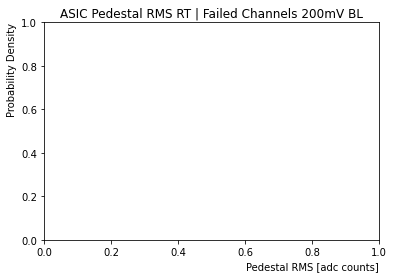

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import NormalDist
from scipy.stats import norm

# Histograms - Append data into pass/fail
pR = []; pM = []; pG = []   # Pass RMS, Mean, Gain
fR = []; fM = []; fG = []   # Failed RMS, Mean, Gain
pE = []; fE = []            # ENC

for i in range(len(Cryocycles)):
    pR.append([]); pM.append([]); pG.append([]); fR.append([]); fM.append([]); fG.append([])
    pE.append([]); fE.append([])

# passMean[chip][cryo][data]
    
for i in range(len(passMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(passMean[i][j])):
            pM[j].append(passMean[i][j][k])
for i in range(len(failMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(failMean[i][j])):
            fM[j].append(failMean[i][j][k])
    
for i in range(len(passRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(passRMS[i][j])):
            pR[j].append(passRMS[i][j][k])
for i in range(len(failRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(failRMS[i][j])):
            fR[j].append(failRMS[i][j][k])
            
for i in range(len(passGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(passGain[i][j])):
            pG[j].append(passGain[i][j][k])
for i in range(len(failGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(failGain[i][j])):
            fG[j].append(failGain[i][j][k])
            
for i in range(len(passENC)):
    for j in range(len(Cryocycles)):
        for k in range(len(passENC[i][j])):
            pE[j].append(passENC[i][j][k])
for i in range(len(failENC)):
    for j in range(len(Cryocycles)):
        for k in range(len(failENC[i][j])):
            fE[j].append(failENC[i][j][k])
            
R0 = pR[0]; R5 = pR[1]; M0 = pM[0]; M5 = pM[1]; G0 = pG[0]; G5 = pG[1]
R20 = pR[2]; M20 = pM[2]; G20 = pG[2]; E0 = pE[0]; E5 = pE[1]; E20 = pE[2]

fR0 = fR[0]; fR5 = fR[1]; fM0 = fM[0]; fM5 = fM[1]; fG0 = fG[0]; fG5 = fG[1]
fR20 = fR[2]; fM20 = fM[2]; fG20 = fG[2]; fE0 = fE[0]; fE5 = fE[1]; fE20 = fE[2]
            

'''The focus of these plots are for the failed distributions, so we dont need to worry about
statistics on the passed distributions - aka no Gaussian fitting for mean, sigma'''

########################################################################
# Limits
RMSlow = 0.; RMShigh = 135.
Meanlow = 1974; Meanhigh = 2621.
Gainlow = 48; Gainhigh = 56
ENClow = 0.; ENChigh = 7000
##########################################################################
# RMS
fig, ax = plt.subplots()
ax.set_title('ASIC Pedestal RMS RT | Failed Channels 200mV BL')
ax.set_xlabel('Pedestal RMS [adc counts]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
ee = max(R0)-min(R0); e = max(R5)-min(R5); f = max(R20)-min(R20); ratio = f/e; ratio_1 = ee/e
binsR5 = 120; binsR20 = int(binsR5*ratio); binsR0 = int(binsR5*ratio_1)

ee_ = max(fR0)-min(fR0); e_ = max(fR5)-min(fR5); f_ = max(fR20)-min(fR20); ratio_ = f_/e_; ratio_1_ = ee_/e_
binsR5_ = 120; binsR20_ = int(binsR5_*ratio_); binsR0_ = int(binsR5_*ratio_1_)

ax.hist(R0, binsR0, histtype = 'stepfilled', stacked = False, color = 'dimgrey', linewidth = 1.5,
             label = 'Passed RMS Distribution RT[0]', density = True)

ax.hist(fR0, binsR0_, histtype = 'stepfilled', stacked = False, color = 'black', linewidth = 1.5,
             label = 'Failed RMS Distribution RT[0]', density = True)

# RT[5]
ax.hist(R5, binsR5, histtype = 'stepfilled', stacked = False, color = 'lightsteelblue', linewidth = 1.5,
             label = 'Passed RMS Distribution RT[5]', density = True)

ax.hist(fR5, binsR5_, histtype = 'stepfilled', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Failed RMS Distribution RT[5]', density = True)

# RT[20]
ax.hist(R20, binsR20, histtype = 'stepfilled', stacked = False, color = 'rosybrown', linewidth = 1.5,
             label = 'Passed RMS Distribution RT[20]', density = True)

ax.hist(fR20, binsR20_, histtype = 'stepfilled', stacked = False, color = 'rosybrown', linewidth = 1.5,
             label = 'Failed RMS Distribution RT[20]', density = True)

count = []
for j in range(len(Cryocycles)):
    count.append(len(fR[j]))

ax.text(.04,0.92,'Number of Failed Channels:',size = 8,transform = ax.transAxes)
ax.text(.04,0.82,'RT[0] = ' + str(fR[0]), size = 8,transform = ax.transAxes)
ax.text(.04,0.77,'RT[5] = ' + str(fR[1]), size = 8,transform = ax.transAxes)
ax.text(.04,0.67,'RT[20] = ' + str(fR[2]), size = 8,transform = ax.transAxes)

ax.set_xlim([RMSlow,RMShigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../RMS RT Failed.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()
'''
#######################################################################################
# Mean
fig, ax = plt.subplots()
ax.set_title('ASIC Pedestal Mean RT | Passed Channels 200mV BL')
ax.set_xlabel('Pedestal Mean [adc counts]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
gg = max(M0)-min(M0); g = max(M5)-min(M5); h = max(M20)-min(M20); ratio1 = h/g; ratio_2 = gg/g
binsM5 = 75; binsM20 = int(binsM5*ratio1); binsM0 = int(binsM5*ratio_2)

mu = M0_mean; sigma = M0_std
count, bins, ignored = ax.hist(M0, binsM0, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'green', linewidth = 1.5,
             label = 'Pedestal Mean RT[0]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', label = 'RT[0] Fit')
# RT[5]
mu = M5_mean; sigma = M5_std
count, bins, ignored = ax.hist(M5, binsM5, histtype = 'step',
             hatch = '...', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Pedestal Mean RT[5]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='darkmagenta', label = 'RT[5] Fit')
# RT[20]
mu = M20_mean; sigma = M20_std
count, bins, ignored = ax.hist(M20, binsM20, histtype = 'step',
             hatch = '///', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Pedestal Mean RT[20]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='navy', label = 'RT[20] Fit')

ax.text(.04,0.92,M0m,size = 8,transform = ax.transAxes)
ax.text(.04,0.87,M5m,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,M20m,size = 8,transform = ax.transAxes)
ax.text(.04,0.77,M0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.67,M5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.57,M20s,size = 8,transform = ax.transAxes)

# 5-sigma values
Msig5_0 = '5σ = ± ' + str(round(5*M0_std,1))
ax.text(.09,0.72,Msig5_0,size = 8,transform = ax.transAxes)
Msig5_5 = '5σ = ± ' + str(round(5*M5_std,1))   
ax.text(.09,0.62,Msig5_5,size = 8,transform = ax.transAxes)
Msig5_20 = '5σ = ± ' + str(round(5*M20_std,1))   
ax.text(.09,0.52,Msig5_20,size = 8,transform = ax.transAxes)
ax.set_xlim([Meanlow,Meanhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../Mean RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

######################################################################################
# Gain
fig, ax = plt.subplots()
ax.set_title('ASIC Gain RT | Passed Channels 200mV BL')
ax.set_xlabel('Gain [e-/adc]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
ll = max(G0)-min(G0); l = max(G5)-min(G5); m = max(G20)-min(G20); ratio2 = m/l; ratio_3 = ll/l
binsG5 = 450; binsG20 = int(binsG5*ratio2); binsG0 = int(binsG5*ratio_3)

mu = G0_mean; sigma = G0_std
count, bins, ignored = ax.hist(G0, binsG0, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'green', linewidth = 1.5,
             label = 'Gain RT[0]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', label = 'RT[0] Fit')
# RT[5]
mu = G5_mean; sigma = G5_std
count, bins, ignored = ax.hist(G5, binsG5, histtype = 'step',
             hatch = '...', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Gain RT[5]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='darkmagenta', label = 'RT[5] Fit')
# RT[20]
mu = G20_mean; sigma = G20_std
count, bins, ignored = ax.hist(G20, binsG20, histtype = 'step',
             hatch = '///', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Gain RT[20]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='navy', label = 'RT[20] Fit')
ax.text(.04,0.92,G0m,size = 8,transform = ax.transAxes)
ax.text(.04,0.87,G5m,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,G20m,size = 8,transform = ax.transAxes)
ax.text(.04,0.77,G0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.67,G5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.57,G20s,size = 8,transform = ax.transAxes)

# 5-sigma values
Gsig5_0 = '5σ = ± ' + str(round(5*G0_std,1))   # 72.1
ax.text(.09,0.72,Gsig5_0,size = 8,transform = ax.transAxes)
Gsig5_5 = '5σ = ± ' + str(round(5*G5_std,1))   
ax.text(.09,0.62,Gsig5_5,size = 8,transform = ax.transAxes)
Gsig5_20 = '5σ = ± ' + str(round(5*G5_std,1))   
ax.text(.09,0.52,Gsig5_20,size = 8,transform = ax.transAxes)
ax.set_xlim([Gainlow,Gainhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../Gain RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

######################################################################################
# ENC
fig, ax = plt.subplots()
ax.set_title('ASIC ENC RT | Passed Channels 200mV BL')
ax.set_xlabel('ENC [e-]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
lll = max(E0)-min(E0); ll = max(E5)-min(E5); mm = max(E20)-min(E20); ratio3 = mm/ll; ratio_4 = lll/ll
binsE5 = 115; binsE20 = int(binsE5*ratio3); binsE0 = int(binsE5*ratio_4)

mu = E0_mean; sigma = E0_std
count, bins, ignored = ax.hist(E0, binsE0, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'green', linewidth = 1.5,
             label = 'ENC RT[0]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', label = 'RT[0] Fit')
# RT[5]
mu = E5_mean; sigma = E5_std
count, bins, ignored = ax.hist(E5, binsE5, histtype = 'step',
             hatch = '...', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'ENC RT[5]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='darkmagenta', label = 'RT[5] Fit')
# RT[20]
mu = E20_mean; sigma = E20_std
count, bins, ignored = ax.hist(E20, binsE20, histtype = 'step',
             hatch = '///', stacked = False, color = 'red', linewidth = 1.5,
             label = 'ENC RT[20]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='navy', label = 'RT[20] Fit')
ax.text(.04,0.92,E0m,size = 8,transform = ax.transAxes)
ax.text(.04,0.87,E5m,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,E20m,size = 8,transform = ax.transAxes)
ax.text(.04,0.77,E0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.67,E5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.57,E20s,size = 8,transform = ax.transAxes)

# 5-sigma values
Esig5_0 = '5σ = ± ' + str(round(5*E0_std,1))
ax.text(.09,0.72,Esig5_0,size = 8,transform = ax.transAxes)
Esig5_5 = '5σ = ± ' + str(round(5*E5_std,1))   
ax.text(.09,0.62,Esig5_5,size = 8,transform = ax.transAxes)
Esig5_20 = '5σ = ± ' + str(round(5*E20_std,1))   
ax.text(.09,0.52,Esig5_20,size = 8,transform = ax.transAxes)
ax.set_xlim([ENClow,ENChigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../ENC RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()
'''

print('done')
